# Week 36

## Exercise 1
### Ex1a)


## Exercise 2

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def RegressionComparision(x, y, maxdegree, lmbda_vals):
    # Create design matrix
    X = np.zeros((n, maxdegree))
    for degree in range(maxdegree):
        X[:, degree] = x[:, 0]**degree
        
    # Identity matrix
    I = np.identity(maxdegree)
    
    # Create design matrix
    X = np.zeros((n, maxdegree))
    for degree in range(maxdegree):
        X[:, degree] = x[:, 0]**degree
    
    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
    # Scale
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    train_mse_ode = np.zeros(len(lmbda_vals))
    test_mse_ode = np.zeros_like(train_mse_ode)
    train_mse_rid = np.zeros_like(train_mse_ode)
    test_mse_rid = np.zeros_like(train_mse_ode)
    for i, lmbda in enumerate(lmbda_vals):
        # Linear regression
        beta_ode = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmbda * I) @ X_train_scaled.T @ y_train
        y_tilde_ode = X_train_scaled @ beta_ode
        y_predict_ode = X_test_scaled @ beta_ode 
        
        # Ridge regression
        beta_rid = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmbda * I) @ X_train_scaled.T @ y_train
        y_tilde_rid = X_train_scaled @ beta_rid 
        y_predict_rid = X_test_scaled @ beta_rid 
        
        # Calculate MSE's
        train_mse_ode[i] = mean_squared_error(y_train, y_tilde_ode)
        test_mse_ode[i] = mean_squared_error(y_test, y_predict_ode)
        train_mse_rid[i] = mean_squared_error(y_train, y_tilde_rid)
        test_mse_rid[i] = mean_squared_error(y_test, y_predict_rid)
        
    # Plot ODE MSE's
    fig = plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(lmbda_vals, train_mse_ode, label="Train")
    plt.plot(lmbda_vals, test_mse_ode, label="Test")
    plt.title("Ordinary Least Squares")
    plt.legend()
    
    # Plot ridge MSE's
    plt.subplot(2, 1, 2)
    plt.plot(lmbda_vals, train_mse_rid, label="Train")
    plt.plot(lmbda_vals, test_mse_rid, label="Test")
    plt.title("Ridge regression")
    plt.legend()
    
    fig.supxlabel("$\lambda$")
    fig.supylabel("MSE")
    fig.suptitle(f"Polynomial degree = {maxdegree}")
    plt.tight_layout()

# Parameters
n = 100
lmbda_vals = np.asarray([0.0001, 0.001, 0.01, 0.1, 1])

# Create random data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

### Polynomial of degree 5:

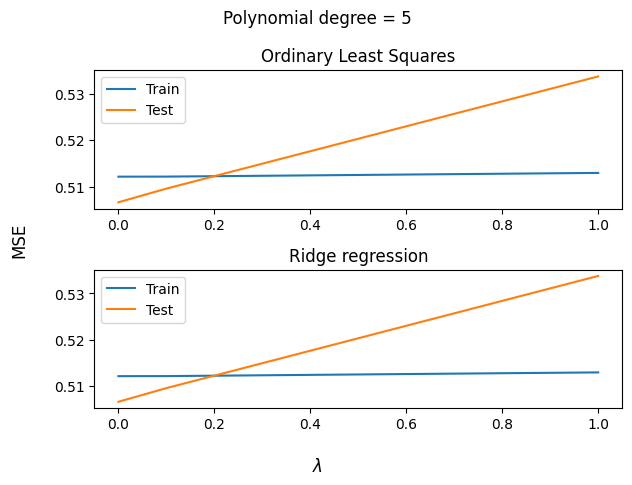

In [75]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=5)

### Polynomial of degree 10:

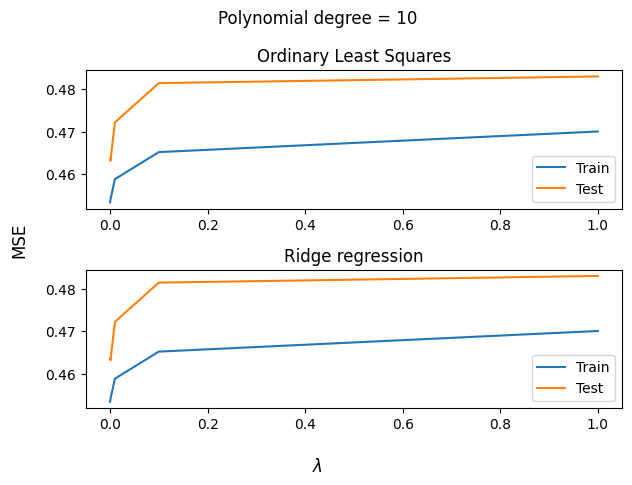

In [76]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=10)

### Polynomial of degree 15:

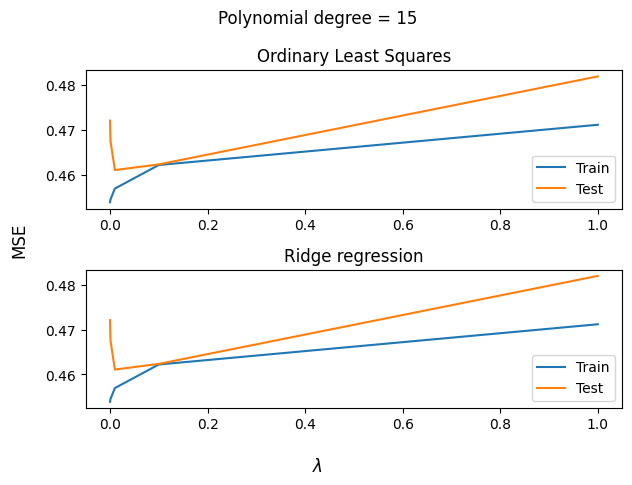

In [77]:
RegressionComparision(x, y, lmbda_vals=lmbda_vals, maxdegree=15)